In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




In [4]:
data=pd.read_csv('/content/processed_equipment_anomaly_data.csv')
data.head()

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,2,0,0.0
1,75.740712,22.954018,2.338095,41.867407,0,1,0.0
2,71.358594,27.276830,1.389198,58.954409,2,4,0.0
3,71.616985,32.242921,1.770690,40.565138,1,0,0.0
4,66.506832,45.197471,0.345398,43.253795,1,3,0.0


In [6]:
#
X = pd.DataFrame(data.drop(['faulty'], axis=1))
y = data['faulty']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [7]:
#  Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# Initialize models
models = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [9]:
# Train, predict, and store accuracy
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

KNN Accuracy: 0.9709
Naive Bayes Accuracy: 0.9857
LDA Accuracy: 0.9422
Decision Tree Accuracy: 0.9696
Random Forest Accuracy: 0.9813


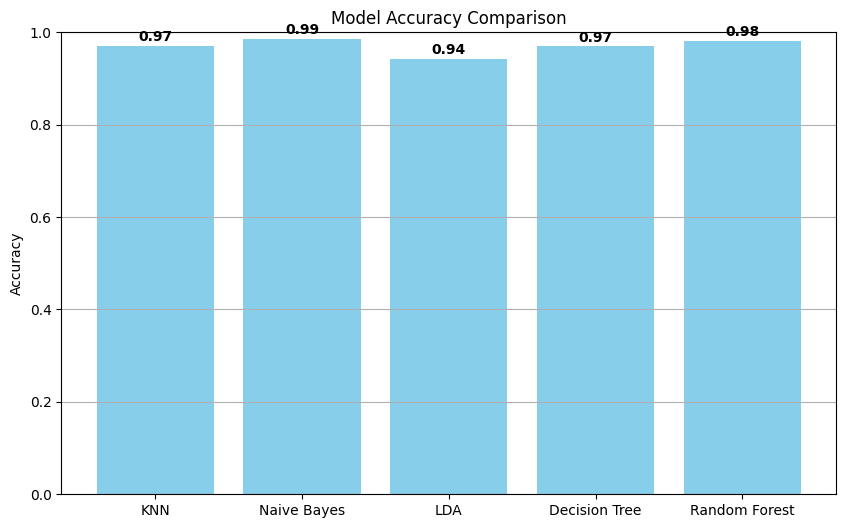

In [10]:
# Plot the accuracy scores
plt.figure(figsize=(10,6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y')
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()